In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:

data = pd.read_csv('./dataset/train.csv')
test_data = pd.read_csv('./dataset/test.csv')

Well look at some of the data

In [107]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [108]:
data.shape

(2000, 21)

seeing if there is any null in the data


In [109]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

What are the data types of the columns

In [110]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [111]:
data.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.000000,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
blue,2000.000000,0.495000,0.500100,0.000000,0.000000,0.000000,1.000000,1.000000
clock_speed,2000.000000,1.522250,0.816004,0.500000,0.700000,1.500000,2.200000,3.000000
dual_sim,2000.000000,0.509500,0.500035,0.000000,0.000000,1.000000,1.000000,1.000000
fc,2000.000000,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000
four_g,2000.000000,0.521500,0.499662,0.000000,0.000000,1.000000,1.000000,1.000000
int_memory,2000.000000,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
m_dep,2000.000000,0.501750,0.288416,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,2000.000000,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
n_cores,2000.000000,4.520500,2.287837,1.000000,3.000000,4.000000,7.000000,8.000000


In [112]:
data['blue']

0       0
1       1
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    0
1998    0
1999    1
Name: blue, Length: 2000, dtype: int64

In [113]:
data['blue'] = data['blue'].astype(object)

In [114]:
data.corr().style.background_gradient(cmap = "Blues")

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
clock_speed,0.011482,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399
pc,0.031441,-0.005245,-0.017143,0.644595,-0.005598,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,-0.001322,-0.008742,0.005389,0.033599


In [115]:
columns = data.columns[data.any()].tolist()
a = []
b = []
for item in columns:
  a.append(data[item].min())
  b.append(data[item].max())
df = pd.DataFrame(columns, columns = ['Col'])
df['min']= a
df['max'] = b
df

,Col,min,max
0,battery_power,501.0,1998.0
1,blue,0.0,1.0
2,clock_speed,0.5,3.0
3,dual_sim,0.0,1.0
4,fc,0.0,19.0
5,four_g,0.0,1.0
6,int_memory,2.0,64.0
7,m_dep,0.1,1.0
8,mobile_wt,80.0,200.0
9,n_cores,1.0,8.0


In [116]:
# get columns whose min is 0 and max is 1
cols = data.columns[(data.min() == 0) & (data.max() == 1)]

# print the selected columns
print(cols)

Index(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], dtype='object')


In [117]:
data[cols] = data[cols].astype('object')
print(data[cols].dtypes)

blue            object
dual_sim        object
four_g          object
three_g         object
touch_screen    object
wifi            object
dtype: object


# categorical features



In [118]:
cat_features = [i for i in data.columns if data.dtypes[i]=='object']
cat_features

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

# Numerical Features

In [119]:
num_features = [i for i in data.columns if data.dtypes[i] in ['int64', 'float']]
num_features[: -1]
num_features

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'price_range']

In [120]:
data.loc[:,'price_range'].value_counts()



1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<AxesSubplot:xlabel='price_range', ylabel='count'>

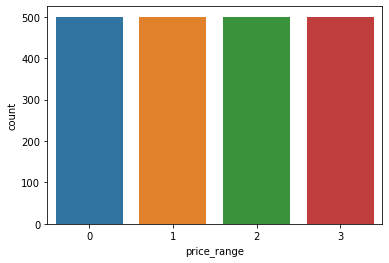

In [121]:
sns.countplot(x = 'price_range',data = data)


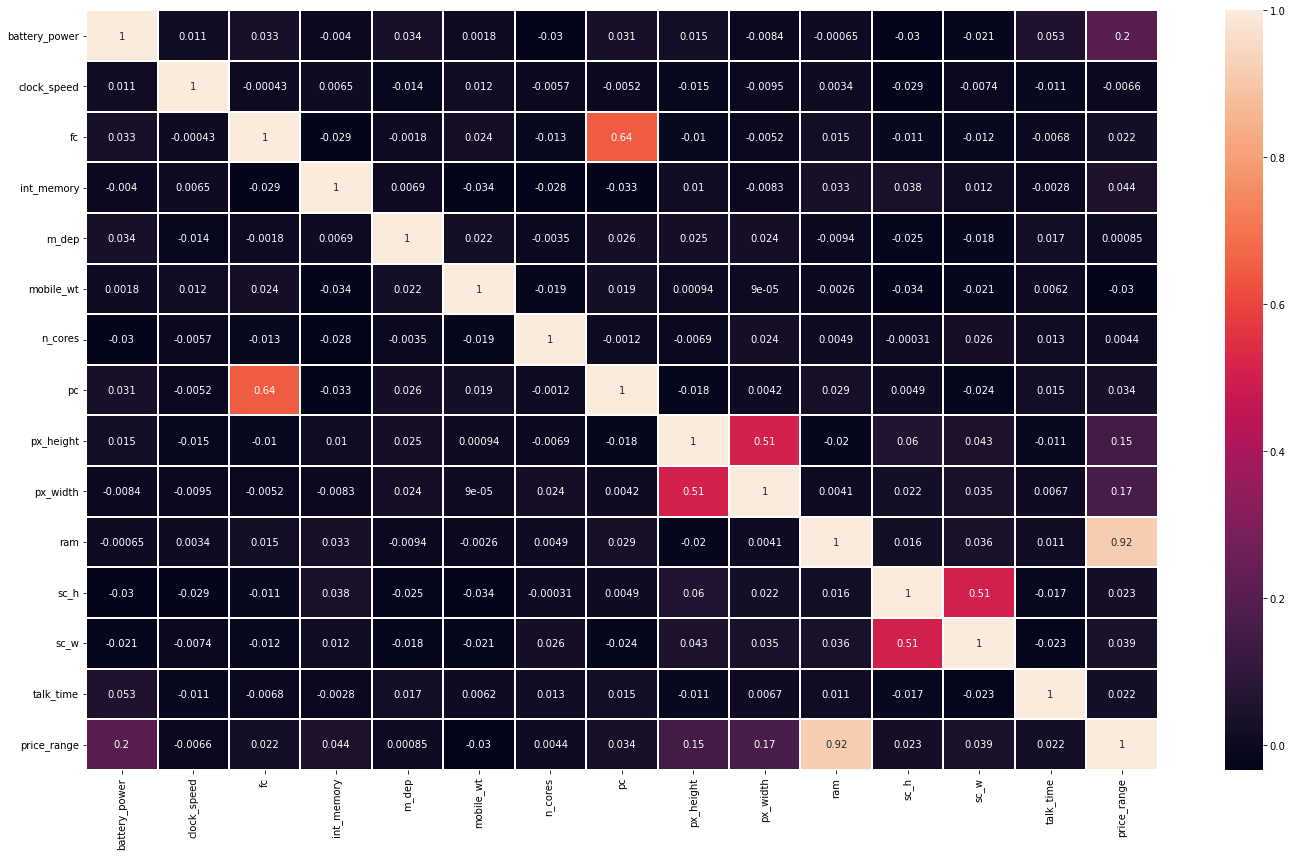

In [122]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot = True, linewidth = 2 )
plt.tight_layout()

<AxesSubplot:title={'center':'Correlation with target feature'}>

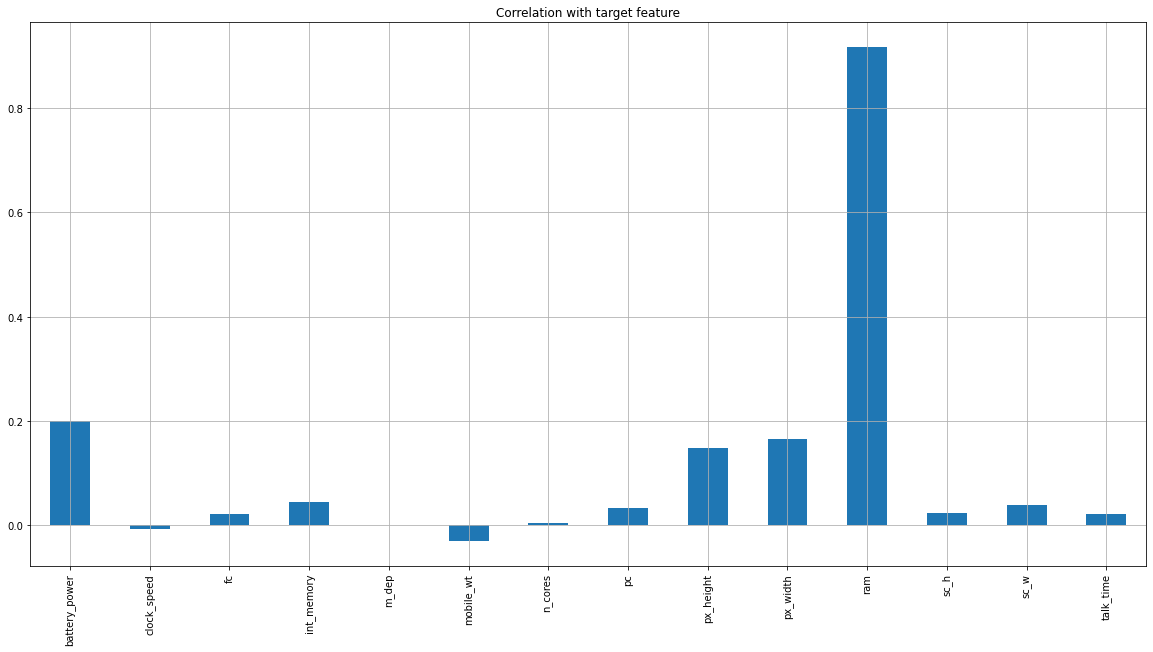

In [123]:
data.drop('price_range', axis=1).corrwith(data.price_range).plot(kind = 'bar', grid = True, figsize=(20,10), 
                                                                 title = 'Correlation with target feature')



# Exploring Numerical Features

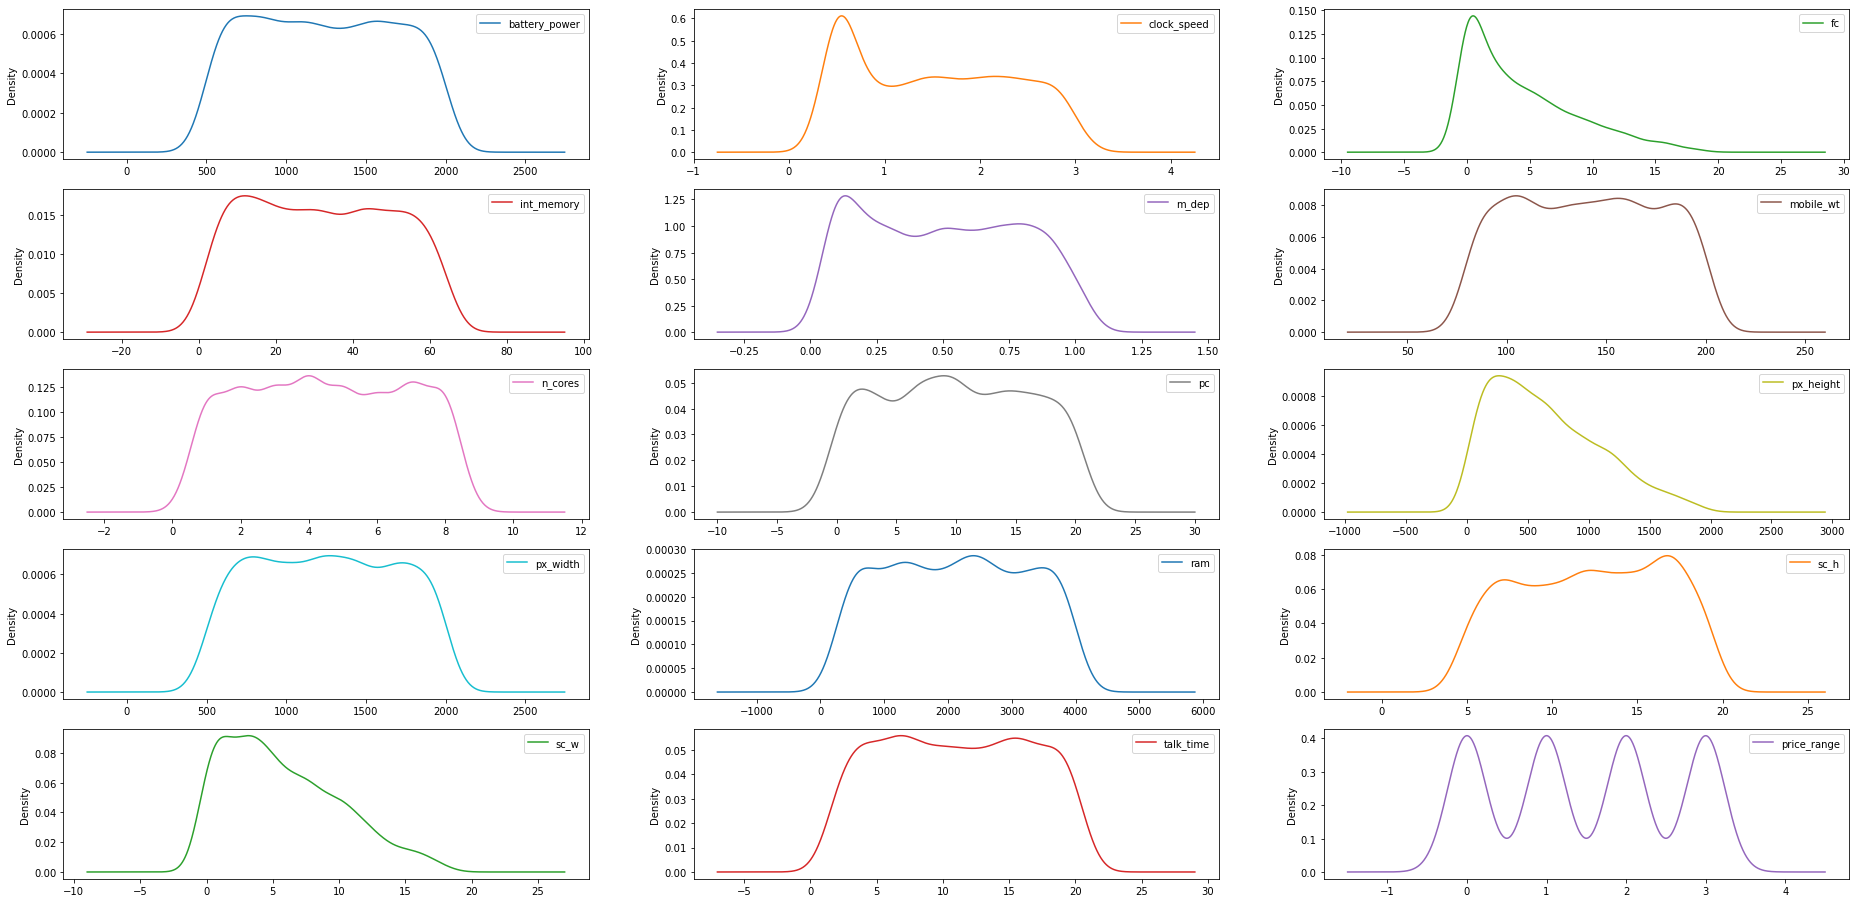

In [124]:
data[num_features].plot(kind='density', layout = (5,3),subplots=True,sharex=False,figsize=(32,16))


plt.show()


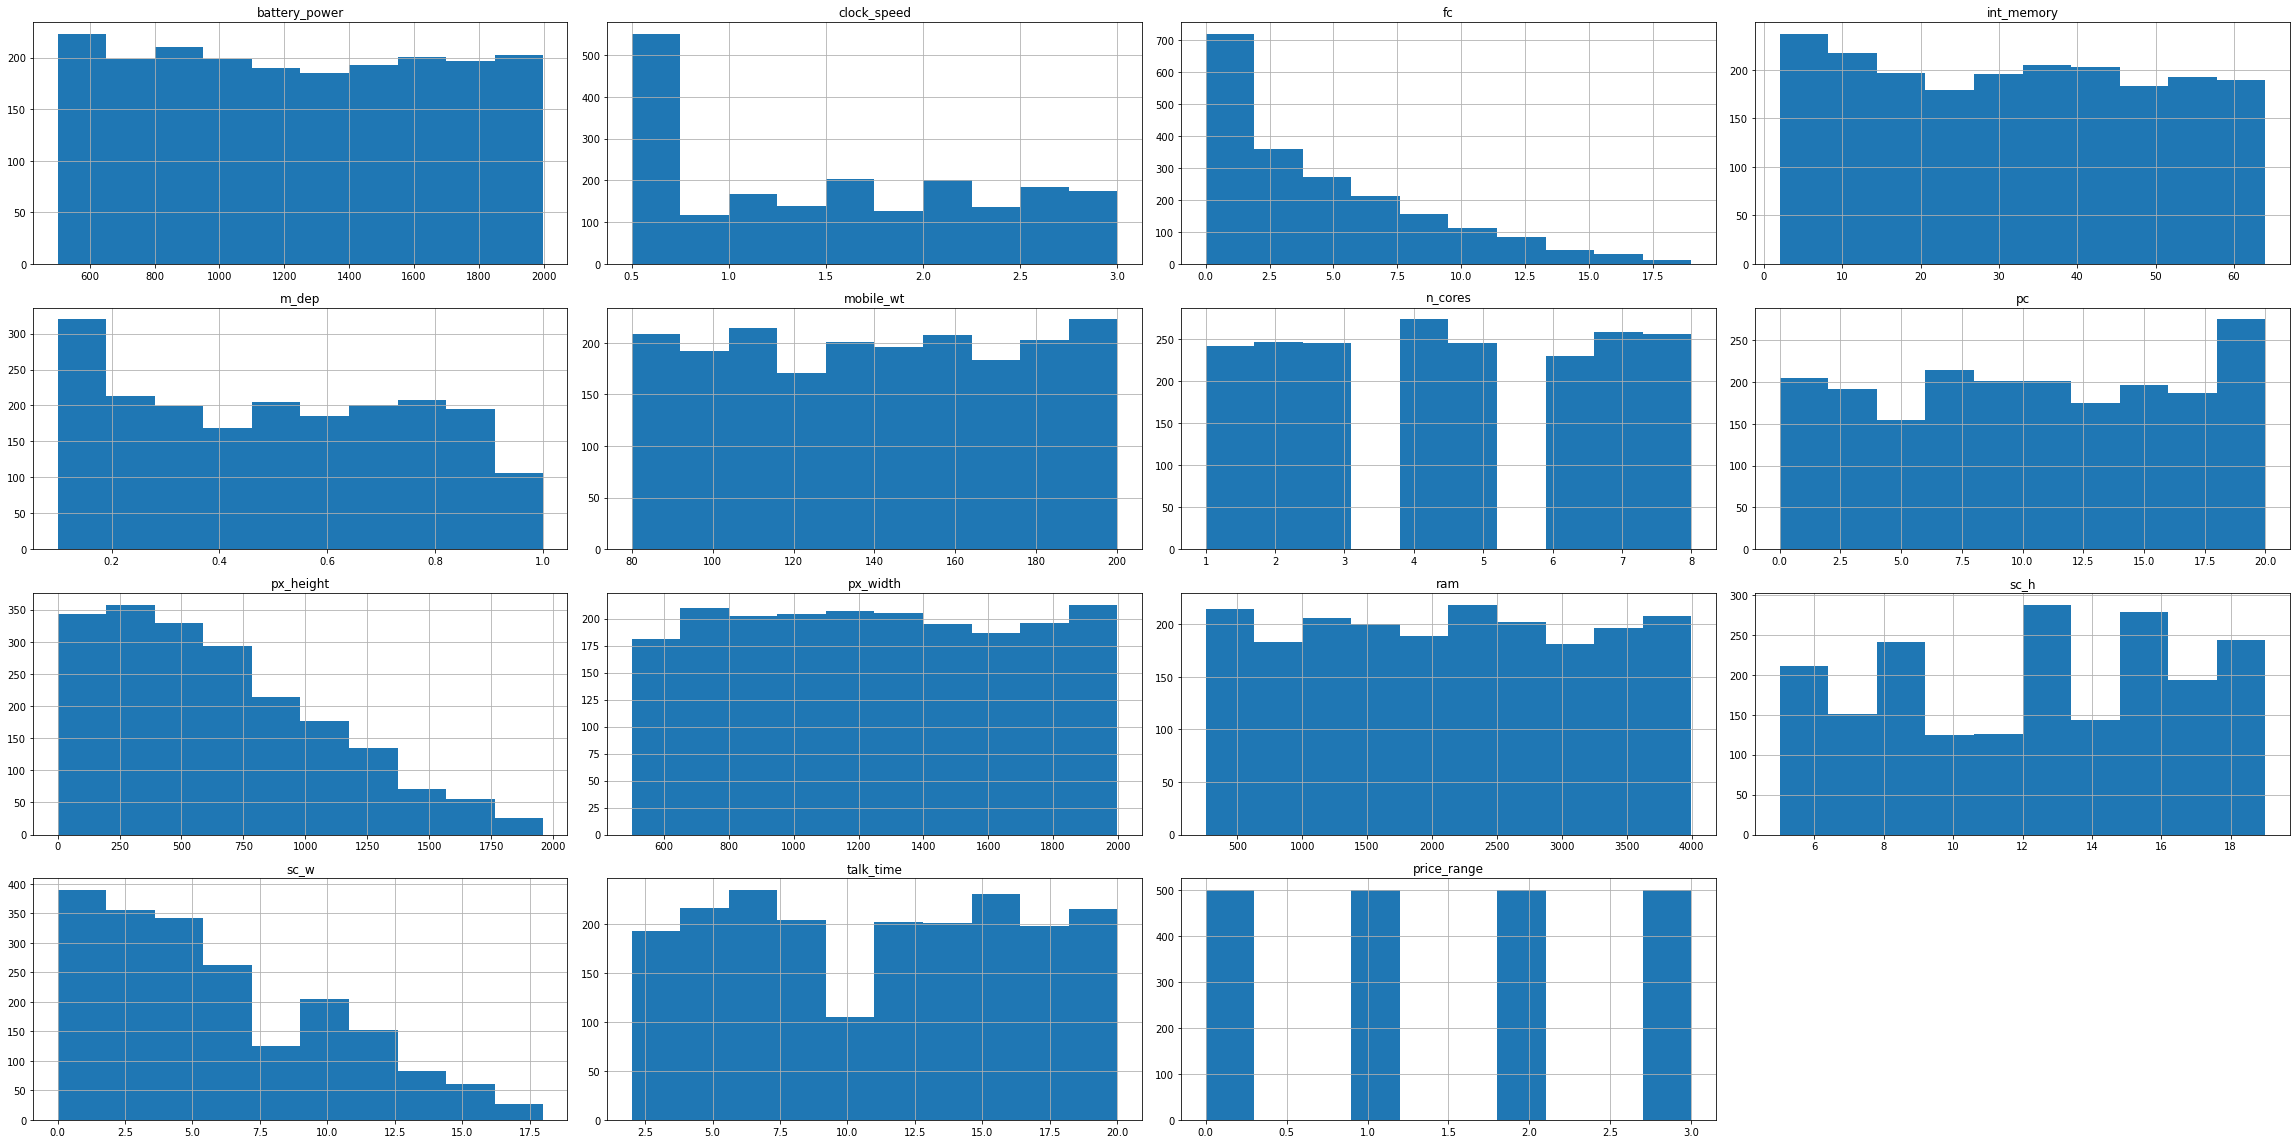

In [125]:
data.hist(figsize=(32,16))
plt.tight_layout()


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


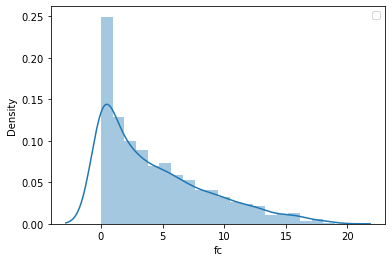

In [126]:
fig = plt.figure(2)
sns.distplot(data['fc'])
plt.legend()


In [127]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


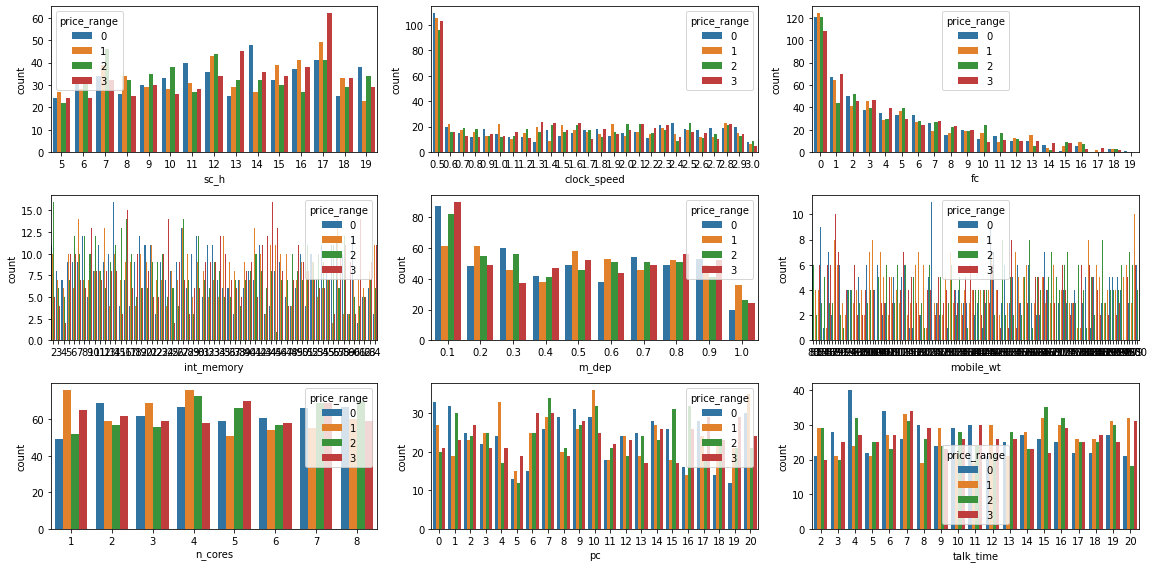

In [128]:
fig, ax = plt.subplots(3,3,figsize = (16,8))
sns.countplot(x=num_features[11],hue='price_range', data=data,ax = ax[0,0])
sns.countplot(x=num_features[1],hue='price_range', data=data,ax = ax[0,1])
sns.countplot(x=num_features[2],hue='price_range', data=data,ax = ax[0,2])
sns.countplot(x=num_features[3],hue='price_range', data=data,ax = ax[1,0])
sns.countplot(x=num_features[4],hue='price_range', data=data,ax = ax[1,1])
sns.countplot(x=num_features[5],hue='price_range', data=data,ax = ax[1,2])
sns.countplot(x=num_features[6],hue='price_range', data=data,ax = ax[2,0])
sns.countplot(x=num_features[7],hue='price_range', data=data,ax = ax[2,1])
sns.countplot(x=num_features[13],hue='price_range', data=data,ax = ax[2,2])

fig.tight_layout()


In [129]:
def kde_numerical_features(column, target) : 
    fig, ax = plt.subplots(figsize = (5,5))
    sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
    sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
    sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
    sns.kdeplot(data[data[target]==3][column], alpha=0.5,shade = True, color="#fccc79", label='3', ax = ax)
    plt.title('KDE-Plot of {}'.format(column), fontsize = 18)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend()
    plt.show()

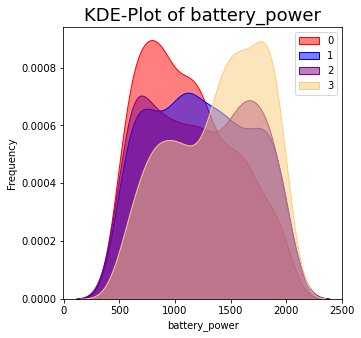

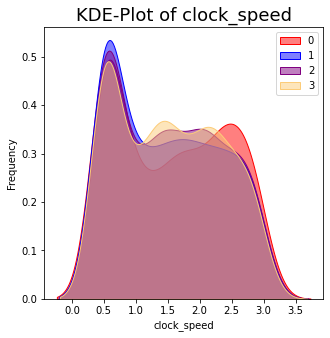

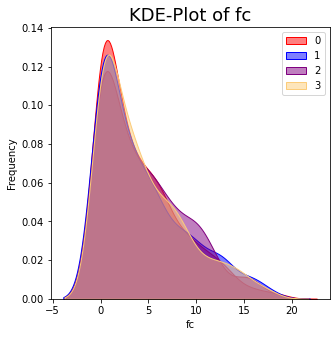

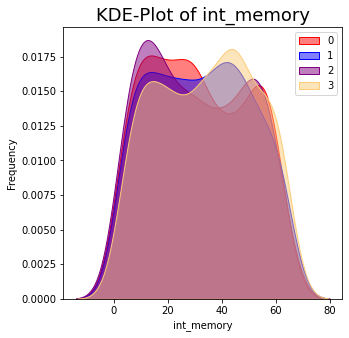

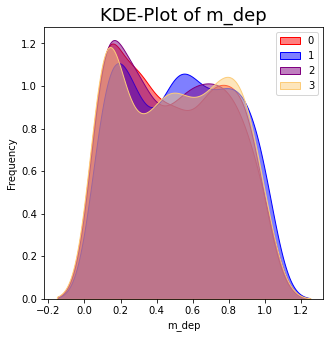

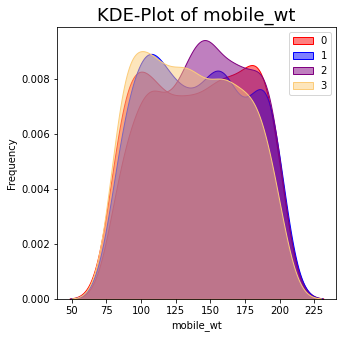

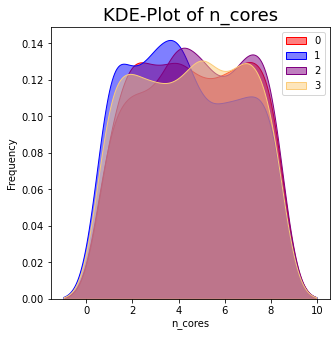

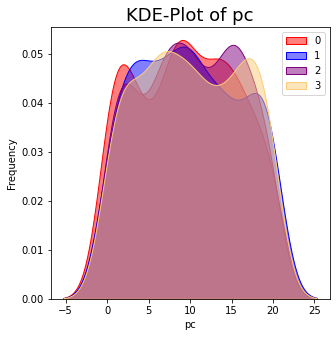

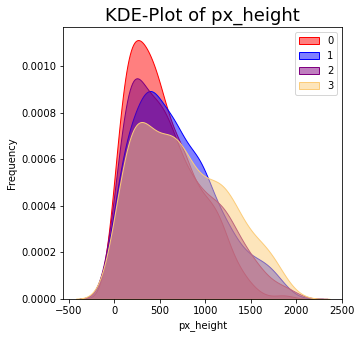

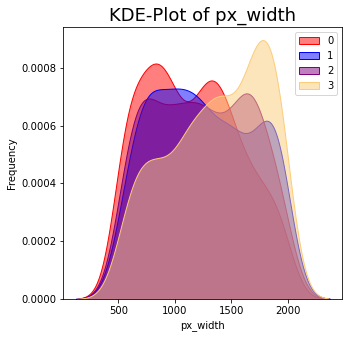

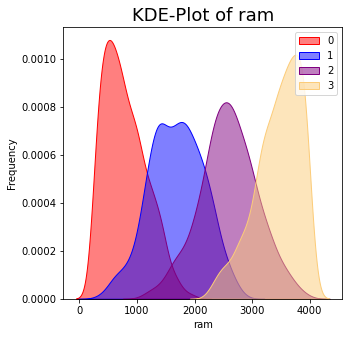

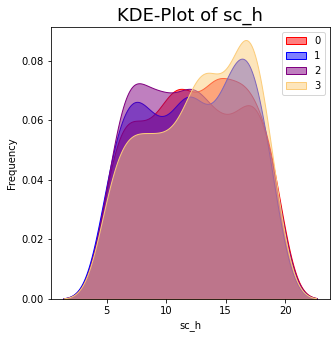

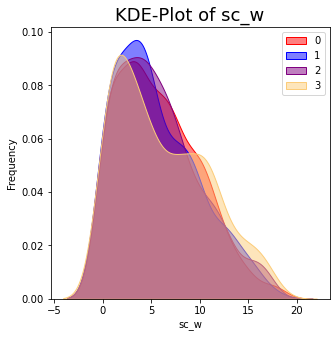

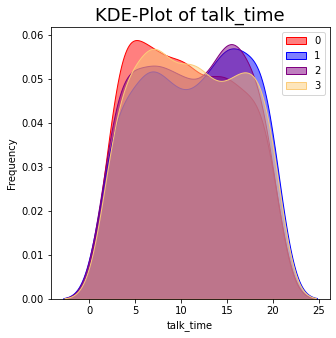

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore a

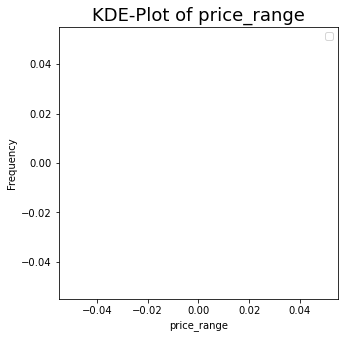

In [130]:
for column in num_features:
    kde_numerical_features(column, "price_range")

# Now for the algorithm implementation


In [131]:
final_df = data
X = final_df.drop(columns=['price_range'],axis=1)
y = final_df['price_range']
models = []

Scaling data to make good
# important dont scale cat data

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

standardizer = StandardScaler()
X_scaled = standardizer.fit_transform(X)

In [133]:
X_scaled

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
RANDOM_STATE = 55

In [135]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.25, random_state=42)

In [136]:
""" print(f"target proportion: {sum(y_train)/len(y_train)}") """
y_train

1738    1
548     2
936     3
1389    0
1607    2
       ..
1130    3
1294    0
860     2
1459    3
1126    1
Name: price_range, Length: 1500, dtype: int64

In [137]:
min_samples_split_list = [2,10,30,50,100,200,300,700] #integer gives actual sample quantity
max_depth_list = [1,2,3,4,8,16,32,64,None] # none means that there is no depth limit
n_estimators_list = [10,50,100,200,300,400,500]

# Finding hyperparameter minsamplesforsplitting

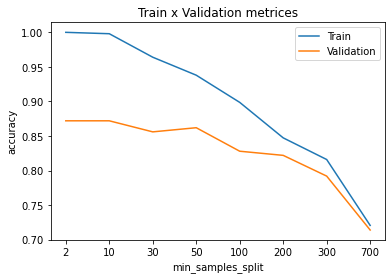

In [138]:
import matplotlib.pyplot as plt
accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split= min_samples_split, random_state = 42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title("Train x Validation metrices")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(["Train", "Validation"])

# Increasing min_samples_split 

Reduces the overfitting drastically train accuracy and test accuracy is near so min_sample_split = 200

# Max_depth hyperparameter

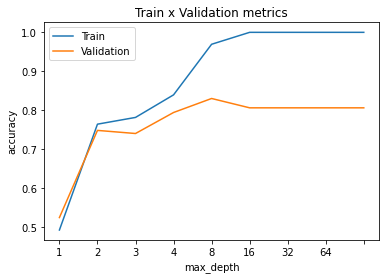

In [139]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 42).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

# max_depth = 4  ideal case

# n_estimators

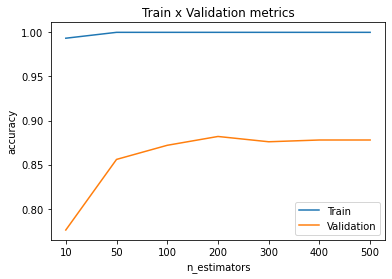

In [140]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators, random_state = 42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
    
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

# n_estimators = 200

In [141]:
random_forest_model = RandomForestClassifier(n_estimators = 200, max_depth = 4 , min_samples_split = 200).fit(X_train, y_train)
models.append(("random_forest", random_forest_model))

In [142]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8327
Metrics test:
	Accuracy score: 0.8060


# XG Boost

In [143]:
from xgboost import XGBClassifier
n = int(len(X_train)*0.8) 

In [144]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [145]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state=42)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)], early_stopping_rounds = 10)

[0]	validation_0-mlogloss:1.25103
[1]	validation_0-mlogloss:1.13988
[2]	validation_0-mlogloss:1.04786
[3]	validation_0-mlogloss:0.97084
[4]	validation_0-mlogloss:0.90192
[5]	validation_0-mlogloss:0.84403
[6]	validation_0-mlogloss:0.79359
[7]	validation_0-mlogloss:0.74984
[8]	validation_0-mlogloss:0.70858
[9]	validation_0-mlogloss:0.67425
[10]	validation_0-mlogloss:0.64047
[11]	validation_0-mlogloss:0.61126
[12]	validation_0-mlogloss:0.58590
[13]	validation_0-mlogloss:0.56325
[14]	validation_0-mlogloss:0.54165
[15]	validation_0-mlogloss:0.52047
[16]	validation_0-mlogloss:0.50285


C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-mlogloss:0.48392
[18]	validation_0-mlogloss:0.46668
[19]	validation_0-mlogloss:0.45120
[20]	validation_0-mlogloss:0.43788
[21]	validation_0-mlogloss:0.42460
[22]	validation_0-mlogloss:0.41492
[23]	validation_0-mlogloss:0.40506
[24]	validation_0-mlogloss:0.39454
[25]	validation_0-mlogloss:0.38304
[26]	validation_0-mlogloss:0.37449
[27]	validation_0-mlogloss:0.36585
[28]	validation_0-mlogloss:0.35891
[29]	validation_0-mlogloss:0.35187
[30]	validation_0-mlogloss:0.34495
[31]	validation_0-mlogloss:0.33790
[32]	validation_0-mlogloss:0.33256
[33]	validation_0-mlogloss:0.32713
[34]	validation_0-mlogloss:0.32172
[35]	validation_0-mlogloss:0.31570
[36]	validation_0-mlogloss:0.31125
[37]	validation_0-mlogloss:0.30677
[38]	validation_0-mlogloss:0.30257
[39]	validation_0-mlogloss:0.29842
[40]	validation_0-mlogloss:0.29334
[41]	validation_0-mlogloss:0.28943
[42]	validation_0-mlogloss:0.28652
[43]	validation_0-mlogloss:0.28407
[44]	validation_0-mlogloss:0.28150
[45]	validation_0-ml

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [146]:
xgb_model.best_iteration

105

In [147]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")
models.append(("XG boost",xgb_model))

Metrics train:
	Accuracy score: 0.9773
Metrics test:
	Accuracy score: 0.8940


# logistic Regression

In [148]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_val)

In [149]:
import joblib
joblib.dump(logreg,r'./dataset/lg.sav')

['./dataset/lg.sav']

In [150]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       132
           1       0.92      0.98      0.95       118
           2       0.99      0.91      0.95       120
           3       0.96      0.99      0.97       130

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [151]:
print(accuracy_score(y_val,y_pred))
models.append(("logistic", logreg))

0.962


Text(0.5, 257.44, 'Predicted label')

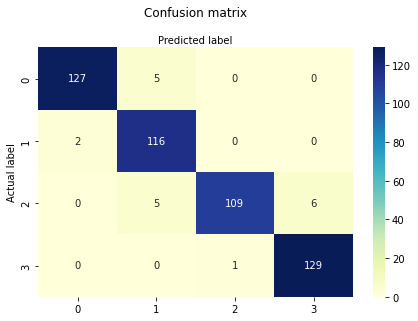

In [152]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



# Linear SVC

In [153]:
linear_svc = LinearSVC()

In [154]:
linear_svc.fit(X_train,y_train)

LinearSVC()

In [155]:
y_pred = model.predict(X_val)

In [156]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       132
           1       0.82      0.87      0.84       118
           2       0.82      0.80      0.81       120
           3       0.92      0.90      0.91       130

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



In [157]:
print(accuracy_score(y_val,y_pred))
models.append(("linear",linear_svc))

0.878


Text(0.5, 257.44, 'Predicted label')

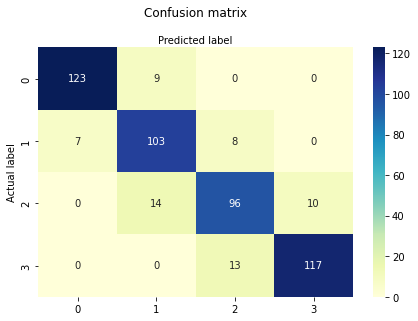

In [158]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# KNeighbour Classifier

In [159]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors= 5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

# acc = accuracy_score(y_val,y_pred)

# print(acc)
models.append(('kneighbour', clf))
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       132
           1       0.36      0.45      0.40       118
           2       0.37      0.38      0.38       120
           3       0.73      0.51      0.60       130

    accuracy                           0.52       500
   macro avg       0.54      0.51      0.52       500
weighted avg       0.54      0.52      0.52       500



# CAT Boosting

In [160]:
import catboost as cb
cb_clf = cb.CatBoostClassifier()

In [161]:
cb_clf.fit(X_train,y_train)

Learning rate set to 0.08078
0:	learn: 1.2805532	total: 8.33ms	remaining: 8.32s
1:	learn: 1.1874020	total: 15.1ms	remaining: 7.55s
2:	learn: 1.1173256	total: 21.3ms	remaining: 7.07s
3:	learn: 1.0548139	total: 26.5ms	remaining: 6.6s
4:	learn: 0.9912600	total: 33ms	remaining: 6.57s
5:	learn: 0.9275809	total: 39.7ms	remaining: 6.58s
6:	learn: 0.8857196	total: 44.9ms	remaining: 6.37s
7:	learn: 0.8445542	total: 50.5ms	remaining: 6.26s
8:	learn: 0.8021059	total: 57.1ms	remaining: 6.28s
9:	learn: 0.7700111	total: 64.2ms	remaining: 6.36s
10:	learn: 0.7351655	total: 70.2ms	remaining: 6.31s
11:	learn: 0.7073044	total: 75.6ms	remaining: 6.22s
12:	learn: 0.6832190	total: 80.9ms	remaining: 6.14s
13:	learn: 0.6572875	total: 87.4ms	remaining: 6.16s
14:	learn: 0.6262938	total: 93.8ms	remaining: 6.16s
15:	learn: 0.6074439	total: 101ms	remaining: 6.2s
16:	learn: 0.5923987	total: 106ms	remaining: 6.12s
17:	learn: 0.5749902	total: 112ms	remaining: 6.09s
18:	learn: 0.5562299	total: 117ms	remaining: 6.06s
1

191:	learn: 0.1130811	total: 1.08s	remaining: 4.54s
192:	learn: 0.1127692	total: 1.08s	remaining: 4.53s
193:	learn: 0.1121999	total: 1.09s	remaining: 4.53s
194:	learn: 0.1119753	total: 1.1s	remaining: 4.54s
195:	learn: 0.1109233	total: 1.11s	remaining: 4.54s
196:	learn: 0.1102488	total: 1.11s	remaining: 4.54s
197:	learn: 0.1096199	total: 1.12s	remaining: 4.53s
198:	learn: 0.1091317	total: 1.12s	remaining: 4.53s
199:	learn: 0.1085773	total: 1.13s	remaining: 4.52s
200:	learn: 0.1083014	total: 1.13s	remaining: 4.51s
201:	learn: 0.1081393	total: 1.14s	remaining: 4.5s
202:	learn: 0.1076397	total: 1.15s	remaining: 4.5s
203:	learn: 0.1071208	total: 1.15s	remaining: 4.49s
204:	learn: 0.1068185	total: 1.16s	remaining: 4.48s
205:	learn: 0.1063658	total: 1.16s	remaining: 4.47s
206:	learn: 0.1058858	total: 1.17s	remaining: 4.47s
207:	learn: 0.1056142	total: 1.17s	remaining: 4.46s
208:	learn: 0.1052690	total: 1.18s	remaining: 4.46s
209:	learn: 0.1047584	total: 1.18s	remaining: 4.45s
210:	learn: 0.1

353:	learn: 0.0646158	total: 1.97s	remaining: 3.6s
354:	learn: 0.0643771	total: 1.98s	remaining: 3.59s
355:	learn: 0.0642583	total: 1.98s	remaining: 3.59s
356:	learn: 0.0641310	total: 1.99s	remaining: 3.58s
357:	learn: 0.0639706	total: 1.99s	remaining: 3.58s
358:	learn: 0.0637921	total: 2s	remaining: 3.57s
359:	learn: 0.0635143	total: 2.01s	remaining: 3.57s
360:	learn: 0.0634347	total: 2.01s	remaining: 3.56s
361:	learn: 0.0632860	total: 2.02s	remaining: 3.56s
362:	learn: 0.0630462	total: 2.02s	remaining: 3.55s
363:	learn: 0.0628950	total: 2.03s	remaining: 3.54s
364:	learn: 0.0625721	total: 2.03s	remaining: 3.54s
365:	learn: 0.0624407	total: 2.04s	remaining: 3.53s
366:	learn: 0.0622118	total: 2.04s	remaining: 3.53s
367:	learn: 0.0620428	total: 2.05s	remaining: 3.52s
368:	learn: 0.0617648	total: 2.05s	remaining: 3.51s
369:	learn: 0.0615361	total: 2.06s	remaining: 3.51s
370:	learn: 0.0612765	total: 2.06s	remaining: 3.5s
371:	learn: 0.0611596	total: 2.07s	remaining: 3.5s
372:	learn: 0.0610

515:	learn: 0.0417367	total: 2.87s	remaining: 2.69s
516:	learn: 0.0416607	total: 2.88s	remaining: 2.69s
517:	learn: 0.0415730	total: 2.88s	remaining: 2.68s
518:	learn: 0.0414921	total: 2.88s	remaining: 2.67s
519:	learn: 0.0413504	total: 2.89s	remaining: 2.67s
520:	learn: 0.0412267	total: 2.89s	remaining: 2.66s
521:	learn: 0.0411426	total: 2.9s	remaining: 2.66s
522:	learn: 0.0410604	total: 2.91s	remaining: 2.65s
523:	learn: 0.0409714	total: 2.91s	remaining: 2.64s
524:	learn: 0.0408501	total: 2.92s	remaining: 2.64s
525:	learn: 0.0407589	total: 2.92s	remaining: 2.63s
526:	learn: 0.0406833	total: 2.93s	remaining: 2.63s
527:	learn: 0.0405996	total: 2.93s	remaining: 2.62s
528:	learn: 0.0405342	total: 2.94s	remaining: 2.62s
529:	learn: 0.0404738	total: 2.94s	remaining: 2.61s
530:	learn: 0.0402856	total: 2.95s	remaining: 2.6s
531:	learn: 0.0401924	total: 2.95s	remaining: 2.6s
532:	learn: 0.0400958	total: 2.96s	remaining: 2.59s
533:	learn: 0.0399853	total: 2.96s	remaining: 2.59s
534:	learn: 0.0

685:	learn: 0.0293877	total: 3.78s	remaining: 1.73s
686:	learn: 0.0293161	total: 3.79s	remaining: 1.72s
687:	learn: 0.0292776	total: 3.79s	remaining: 1.72s
688:	learn: 0.0292037	total: 3.8s	remaining: 1.71s
689:	learn: 0.0291322	total: 3.8s	remaining: 1.71s
690:	learn: 0.0290975	total: 3.8s	remaining: 1.7s
691:	learn: 0.0290265	total: 3.81s	remaining: 1.7s
692:	learn: 0.0289648	total: 3.81s	remaining: 1.69s
693:	learn: 0.0289199	total: 3.82s	remaining: 1.68s
694:	learn: 0.0288727	total: 3.82s	remaining: 1.68s
695:	learn: 0.0288598	total: 3.83s	remaining: 1.67s
696:	learn: 0.0288004	total: 3.83s	remaining: 1.67s
697:	learn: 0.0287445	total: 3.84s	remaining: 1.66s
698:	learn: 0.0286883	total: 3.84s	remaining: 1.65s
699:	learn: 0.0286549	total: 3.85s	remaining: 1.65s
700:	learn: 0.0286015	total: 3.85s	remaining: 1.64s
701:	learn: 0.0285354	total: 3.85s	remaining: 1.64s
702:	learn: 0.0284821	total: 3.86s	remaining: 1.63s
703:	learn: 0.0284502	total: 3.86s	remaining: 1.63s
704:	learn: 0.028

880:	learn: 0.0211852	total: 4.68s	remaining: 632ms
881:	learn: 0.0211638	total: 4.69s	remaining: 627ms
882:	learn: 0.0211539	total: 4.69s	remaining: 622ms
883:	learn: 0.0211300	total: 4.7s	remaining: 616ms
884:	learn: 0.0211143	total: 4.7s	remaining: 611ms
885:	learn: 0.0210786	total: 4.71s	remaining: 606ms
886:	learn: 0.0210111	total: 4.71s	remaining: 600ms
887:	learn: 0.0209845	total: 4.71s	remaining: 595ms
888:	learn: 0.0209621	total: 4.72s	remaining: 589ms
889:	learn: 0.0209209	total: 4.72s	remaining: 584ms
890:	learn: 0.0208866	total: 4.73s	remaining: 579ms
891:	learn: 0.0208741	total: 4.73s	remaining: 573ms
892:	learn: 0.0208536	total: 4.74s	remaining: 568ms
893:	learn: 0.0208383	total: 4.74s	remaining: 562ms
894:	learn: 0.0208150	total: 4.75s	remaining: 557ms
895:	learn: 0.0207927	total: 4.75s	remaining: 552ms
896:	learn: 0.0207463	total: 4.76s	remaining: 546ms
897:	learn: 0.0207218	total: 4.76s	remaining: 541ms
898:	learn: 0.0207007	total: 4.76s	remaining: 535ms
899:	learn: 0.

In [162]:
y_pred = model.predict(X_val)

In [163]:
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val,y_pred))
# models.append(("catboost", cb_clf))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       132
           1       0.82      0.87      0.84       118
           2       0.82      0.80      0.81       120
           3       0.92      0.90      0.91       130

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500

0.878


Text(0.5, 257.44, 'Predicted label')

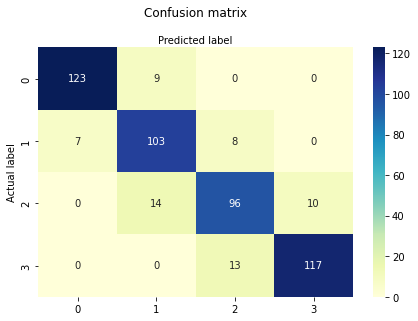

In [164]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# LGBM Classifier

In [165]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)

print(classification_report(y_val,y_pred))
models.append(("lgbm",clf))


              precision    recall  f1-score   support

           0       0.95      0.94      0.94       132
           1       0.86      0.92      0.89       118
           2       0.88      0.83      0.85       120
           3       0.92      0.91      0.91       130

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



Text(0.5, 257.44, 'Predicted label')

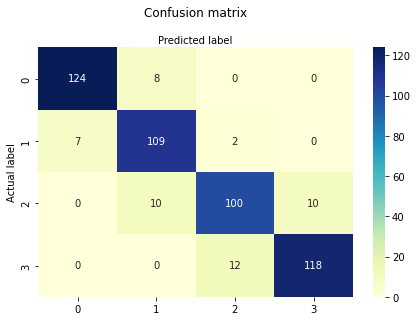

In [166]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [167]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score


def score_models(models, X_train, y_train, cv=10):
  scores = []
  for model_name, model in models:
    score = cross_val_score(model, X_train, y_train, cv=cv)
    print(f"{model_name}: {np.median(score)}")
    scores.append((model_name, score))
  return scores
scores = score_models(models,X_train,y_train)

random_forest: 0.7966666666666666
XG boost: 0.92
logistic: 0.96


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the n

linear: 0.8300000000000001
kneighbour: 0.5
lgbm: 0.9133333333333333


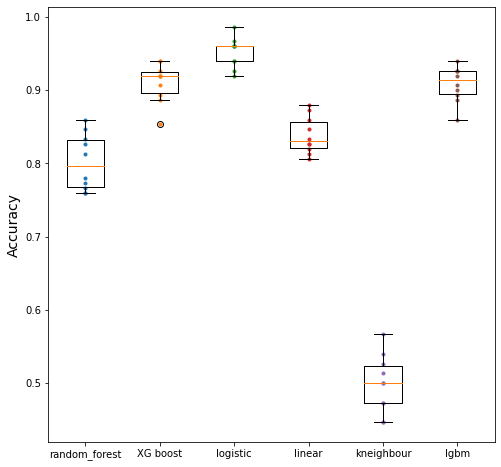

In [170]:
import matplotlib.pyplot as plt
cv=10
def plot_scores(scores):
  plt.figure(figsize=(8, 8))
  i = 1
  for model_name, score in scores:
    plt.plot([i]*cv, score, ".")
    i += 1

  plt.boxplot([score for _, score in scores], 
              labels=[model_name for model_name, _ in scores])
  plt.ylabel("Accuracy", fontsize=14)
  plt.show()

plot_scores(scores)

choosing a model

In [171]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def final_eval_model(model):
  global X_test, y_test
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))


In [177]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid=[
            {'poly__degree': [2, 3, 4, 5],
             'linear__C': [0.1, 0.5, 1, 5, 10], 
             'linear__penalty': ['none', 'l2'],
             'linear__solver': ['newton-cg', 'lbfgs', 'sag']},
		        {'linear__C': [0.1, 0.5, 1, 5, 10], 
             'linear__penalty': ['l1', 'l2'],
		         'linear__solver': ['liblinear'],
             'poly__degree': [2, 3, 4, 5]
             }
            ]

from sklearn.preprocessing import PolynomialFeatures

grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True)
# grid_search = clf
# grid_search = RandomizedSearchCV(clf, distribution, n_iter=30, scoring='accurary')

In [178]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

[LightGBM] [Warning] Unknown parameter: linear__penalty
[LightGBM] [Warning] Unknown parameter: linear__C
[LightGBM] [Warning] Unknown parameter: linear__solver
[LightGBM] [Warning] Unknown parameter: poly__degree
[LightGBM] [Warning] Unknown parameter: linear__penalty
[LightGBM] [Warning] Unknown parameter: linear__C
[LightGBM] [Warning] Unknown parameter: linear__solver
[LightGBM] [Warning] Unknown parameter: poly__degree
[LightGBM] [Warning] Unknown parameter: linear__penalty
[LightGBM] [Warning] Unknown parameter: linear__C
[LightGBM] [Warning] Unknown parameter: linear__solver
[LightGBM] [Warning] Unknown parameter: poly__degree
[LightGBM] [Warning] Unknown parameter: linear__penalty
[LightGBM] [Warning] Unknown parameter: linear__C
[LightGBM] [Warning] Unknown parameter: linear__solver
[LightGBM] [Warning] Unknown parameter: poly__degree
[LightGBM] [Warning] Unknown parameter: linear__penalty
[LightGBM] [Warning] Unknown parameter: linear__C
[LightGBM] [Warning] Unknown parameter

KeyboardInterrupt: 

In [179]:
import joblib
joblib.dump(random_forest_model, 'model.pkl', compress = 1)

['model.pkl']